<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error as mae

In [3]:
file_list = ['gold_recovery_full_new', 'gold_recovery_train_new', 'gold_recovery_test_new']
file_dict =  dict.fromkeys(file_list)
for i in file_dict:
    pth1 = i + '.csv'
    pth2 = '/datasets/' + i + '.csv'

    if os.path.exists(pth1):
        file_dict[i] = pd.read_csv(pth1)
    elif os.path.exists(pth2):
        file_dict[i] = pd.read_csv(pth2)
    else:
        print('Something is wrong')

In [4]:
pd.options.display.max_columns = 100
#pd.options.display.min_rows = 100

In [5]:
df_full = file_dict['gold_recovery_full_new']
df_train = file_dict['gold_recovery_train_new']
df_test = file_dict['gold_recovery_test_new']

In [6]:
df_list = [df_full, df_train, df_test]

In [7]:
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [8]:
for df in df_list:
    print(f'Выборка содержит {len(df) / len(df_full):.1%} от полного набора данных')
    df.info()
    print()

Выборка содержит 100.0% от полного набора данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol      

Полная выборка содержит 19 439 и 87 столбцов. Столбец `date` содержит дату и время и, вероятно, может служить идентификатором наблюдения, записи выполнены с промежутком в один час. Остальные признаки отражают характеристики технологического процесса и имеют числовой тип данных.  
Обучающая выборка содержит 14 149 строк или 72,8% от полного датасета.  
Тестовая выборка содержит 5 290 строк или 27,2 % от полного датасета. Количестов признаков в тестовой выборке составляет 53 признака, что на 34 меньше чем в полном и обучающем наборе данных.

In [9]:
for df in df_list:
    df['date'] = pd.to_datetime(df['date'])

In [10]:
for df in df_list:
    display(df.isna().agg(['sum', 'mean']).T.query('sum > 0'))

,sum,mean
final.output.concentrate_ag,1.0,0.000051
final.output.concentrate_pb,1.0,0.000051
final.output.concentrate_sol,211.0,0.010854
final.output.tail_ag,1.0,0.000051
final.output.tail_pb,101.0,0.005196
...,...,...
secondary_cleaner.state.floatbank5_a_level,1.0,0.000051
secondary_cleaner.state.floatbank5_b_air,1.0,0.000051
secondary_cleaner.state.floatbank5_b_level,1.0,0.000051
secondary_cleaner.state.floatbank6_a_air,2.0,0.000103


,sum,mean
final.output.concentrate_ag,1.0,0.000071
final.output.concentrate_pb,1.0,0.000071
final.output.concentrate_sol,211.0,0.014913
final.output.tail_pb,100.0,0.007068
final.output.tail_sol,5.0,0.000353
...,...,...
secondary_cleaner.state.floatbank5_a_level,1.0,0.000071
secondary_cleaner.state.floatbank5_b_air,1.0,0.000071
secondary_cleaner.state.floatbank5_b_level,1.0,0.000071
secondary_cleaner.state.floatbank6_a_air,2.0,0.000141


,sum,mean
primary_cleaner.input.sulfate,4.0,0.000756
primary_cleaner.input.depressant,5.0,0.000945
primary_cleaner.input.xanthate,4.0,0.000756
rougher.input.feed_rate,3.0,0.000567
rougher.input.feed_size,1.0,0.000189
rougher.input.feed_sol,21.0,0.003970
rougher.input.floatbank10_sulfate,5.0,0.000945
rougher.input.floatbank11_sulfate,8.0,0.001512
rougher.input.floatbank11_xanthate,25.0,0.004726
secondary_cleaner.state.floatbank2_a_air,3.0,0.000567


Максимальное количество пропусков в полном наборе данных содержится в столбце `secondary_cleaner.output.tail_sol` - 1748 пропусков или 9% от исходной выборки. По остальным столбцам максимальная доля пропусков менее 3% пропусков. Аналогичный характер пропусков по признакам наблюдается и в обучающей выборке. В тестовой выборке максимальная доля пропущенных записей составляет менее 0,5% от общего количества строк в наборе.  
Можно заметить, что столбец `secondary_cleaner.output.tail_sol` с максимальным количеством пропусков в полном и обучающем наборе данных, отсутствует в тестовых данных.

Определим названия столбцов, отсутствующие в тестовом датасете. 

In [11]:
df_test.columns

Index(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'roughe

In [12]:
set(df_train.columns) - set(df_test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовом датасете отсутствуют все признаки, характеризующие выходные параметры продукта `output`, а также расчетные параметры `calculation`. Вероятно, данные параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Перед обучением модели данные признаки должны быть удалены.

По условию, эффективность обогащения рассчитывается по формуле  

![recovery](https://pictures.s3.yandex.net/resources/Recovery_1576238822.jpg)  
где:  
C — доля золота в концентрате после флотации/очистки;  
F — доля золота в сырье/концентрате до флотации/очистки;  
T — доля золота в отвальных хвостах после флотации/очистки.

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между нашими расчётами и значением признака

In [13]:
df_train['rougher.output.recovery_check'] = (df_train['rougher.output.concentrate_au'] * 
    (df_train['rougher.input.feed_au'] - df_train['rougher.output.tail_au']) / (df_train['rougher.input.feed_au'] *
    (df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au'])) * 100)

In [14]:
mae(df_train['rougher.output.recovery_check'], df_train['rougher.output.recovery'])

9.73512347450521e-15

Эффективность обогащения в данных рассчитана верно, т.к. средняя абсолютная ошибка между значениями, взятыми из данных и рассчитанных по соответствующей формуле практически равна нулю.

In [15]:
df_train.drop('rougher.output.recovery_check' ,axis=1, inplace=True)

## Анализ данных

Рассмотрим особенности целевых признаков `final.output.recovery` и `rougher.output.recovery` 

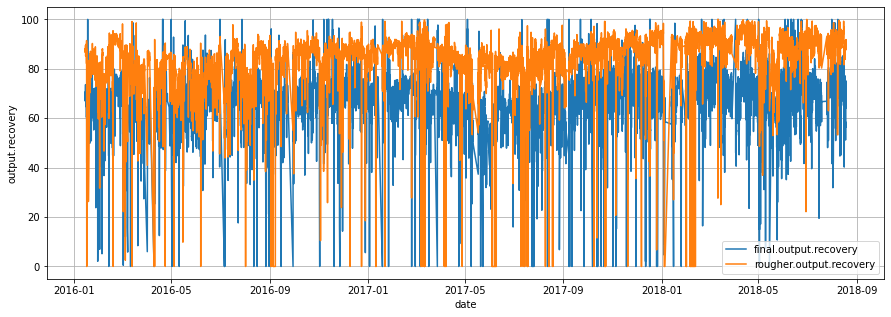

In [16]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df_full, x='date', y='final.output.recovery', label='final.output.recovery')
sns.lineplot(data=df_full, x='date', y='rougher.output.recovery', label='rougher.output.recovery')
plt.ylabel('output.recovery')
plt.grid()

In [17]:
df_full[['final.output.recovery', 'rougher.output.recovery']].describe()

,final.output.recovery,rougher.output.recovery
count,19439.000000,19439.000000
mean,67.050208,83.328587
std,10.125840,14.148086
min,0.000000,0.000000
25%,63.299712,81.037957
50%,68.172738,86.188892
75%,72.686642,90.010670
max,100.000000,100.000000


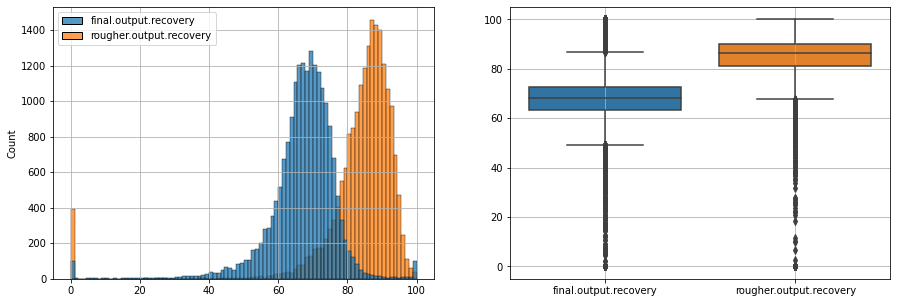

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=df_full[['final.output.recovery', 'rougher.output.recovery']])
plt.grid()
plt.subplot(1,2,2)
sns.boxplot(data=df_full[['final.output.recovery', 'rougher.output.recovery']])
plt.grid()
plt.show()


Среднее значение эффективности обогащения финального концентрата составляет 67%, чернового концентрата - 83%. Основная масса значений по эффективности находятся в достаточно узком интервале: для финального концентрата - в районе 63-73% (межквартильный размах), для чернового - 81-90%. При этом имеется достаточно большое количество нулевых значений, которые могут быть связаны как с ошибками, так и характеризовать особенности технологического процесса (например, некачественное исходное сырье, сбои в подаче реагентов и т.д.). Данных для обоснованного исключения нулевых значений недостаточно, вероятнее всего их лучше оставить на данном этапе.

Определим, с какими параметрами целевые признаки `final.output.recovery` и `rougher.output.recovery` коррелируют больше всего.

In [19]:
{col:df_full['final.output.recovery'].corr(df_full[col]) for col in df_full.columns[1:] if 
                                        0.3 < df_full['final.output.recovery'].corr(df_full[col]) < 0.999}

{'primary_cleaner.input.sulfate': 0.3669536953967901,
 'rougher.input.floatbank10_xanthate': 0.3280661101050723,
 'rougher.input.floatbank11_xanthate': 0.32823148330300317,
 'rougher.output.recovery': 0.32705873241331146}

In [20]:
{col:df_full['rougher.output.recovery'].corr(df_full[col]) for col in df_full.columns[1:] if 
                                        0.3 < df_full['rougher.output.recovery'].corr(df_full[col]) < 0.999}

{'final.output.recovery': 0.32705873241331146,
 'rougher.output.concentrate_ag': 0.6613298609533822,
 'rougher.output.concentrate_pb': 0.5526222912970306,
 'rougher.output.concentrate_sol': 0.6044195400804127,
 'rougher.output.concentrate_au': 0.5796384870738654}

Эффективность обогащения финального концентрата слабо коррелирует с остальными признаками, максимальный коэффициент корреляции в районе 0,33-0,37 наблюдается c некоторыми параметрами добавляемых реагентов Xanthate и Sulphate.  
Эффективность обогащения чернового концентрата достаточно сильно коррелирует с концентрациями металлов после флотации. Также целевые признаки положительно коррелируют между собой.

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

au


,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,8.266097,19.772000,32.119400,44.076513
std,1.955092,3.753600,5.627611,5.129784
min,0.010000,0.000000,0.000000,0.000000
25%,6.854384,18.802523,30.463140,43.402215
50%,8.125839,20.280214,32.841295,45.011244
75%,9.769917,21.717843,35.048006,46.275313
max,13.731330,28.824507,45.933934,52.756638


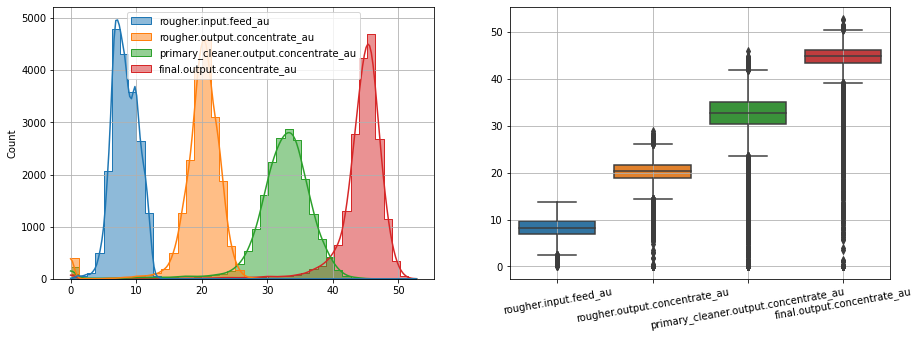

ag


,rougher.input.feed_ag,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
count,19439.000000,19439.000000,19439.000000,19438.000000
mean,8.794927,11.994759,8.442408,5.168470
std,1.936847,2.733862,2.054465,1.372348
min,0.010000,0.000000,0.000000,0.000000
25%,7.237967,10.628337,7.263288,4.251240
50%,8.593574,12.098115,8.507298,5.066094
75%,10.213771,13.736996,9.809001,5.895527
max,14.596026,24.480271,16.081632,16.001945


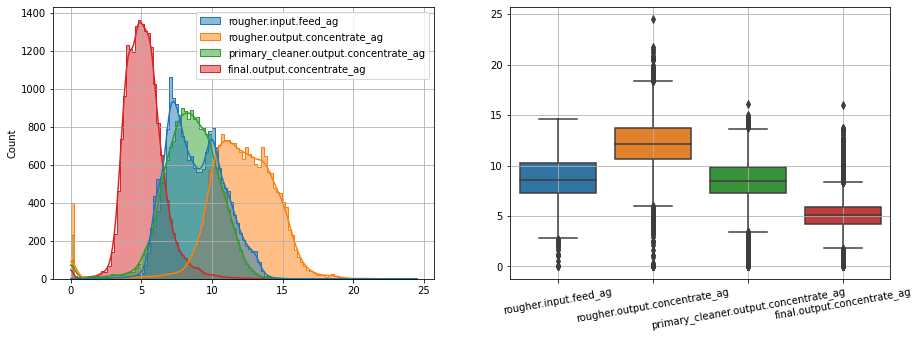

pb


,rougher.input.feed_pb,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
count,19339.000000,19439.000000,19323.000000,19438.000000
mean,3.598085,7.606272,9.829530,9.978895
std,1.049486,1.796757,2.556843,1.669240
min,0.010000,0.000000,0.000000,0.000000
25%,2.887280,6.725987,8.702328,9.137262
50%,3.534895,7.742580,10.152433,10.102433
75%,4.244161,8.565199,11.424971,11.035769
max,7.142594,13.617072,17.081278,17.031899


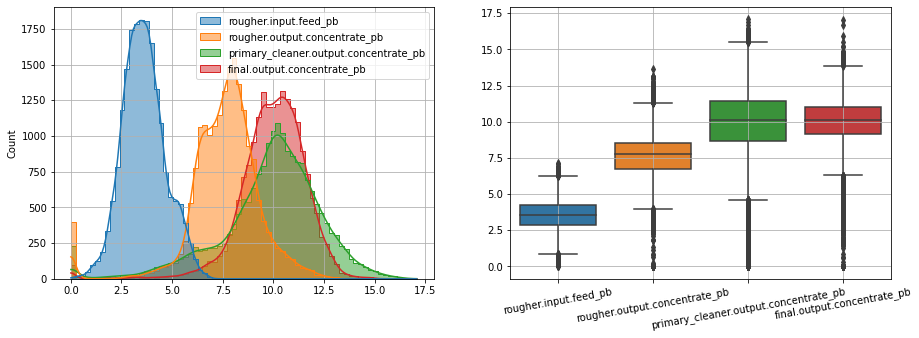

In [21]:
for metal in ['au', 'ag', 'pb']:
    print(metal)
    display(df_full[['rougher.input.feed_'+metal,'rougher.output.concentrate_'+metal, 
        'primary_cleaner.output.concentrate_'+metal,'final.output.concentrate_'+metal]].describe())
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.histplot(data=df_full[['rougher.input.feed_'+metal, 'rougher.output.concentrate_'+metal, 
        'primary_cleaner.output.concentrate_'+metal,'final.output.concentrate_'+metal]], element='step', kde=True)
    plt.grid()
    plt.subplot(1,2,2)
    sns.boxplot(data=df_full[['rougher.input.feed_'+metal, 'rougher.output.concentrate_'+metal, 
        'primary_cleaner.output.concentrate_'+metal,'final.output.concentrate_'+metal]])
    plt.grid()
    plt.xticks(rotation=10)
    plt.show()

Концентрация Au увеличивается примерно на 12% на каждом из этапов обработки, c 8% в исходном сырье до 20% на выходе из флотационной установки, до 32% на выходе из первого этапа очистки и до 44% на конечной стадии очистки.  
Содержание Ag увеличивается во флотационной установке с 8,8 до 12%, дальнейшая обработка ведет к его сокращению  до 5%. На конечной стадии диапазон концентрации существенно сжимается по сравнению с диапазонами концентрации серебра исходного сырья.  
Содержание Pb увеличивается на начальных этапах обработки - на этапе флотации с 3,6% до 7,6%, на этапе первичной обработки с 7,6 до 9,8%. На втором этапе очистки среднее значение концентрации свинца практически не меняется, при этом диапазон принимаемых значений несколько сужается. 


Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.

sample,test,train
count,5289.000000,14005.000000
mean,55.951097,60.110518
std,19.081758,22.418485
min,0.046369,9.659576
25%,43.906347,48.973027
50%,50.841029,55.373885
75%,62.431047,66.080172
max,392.494040,484.967466


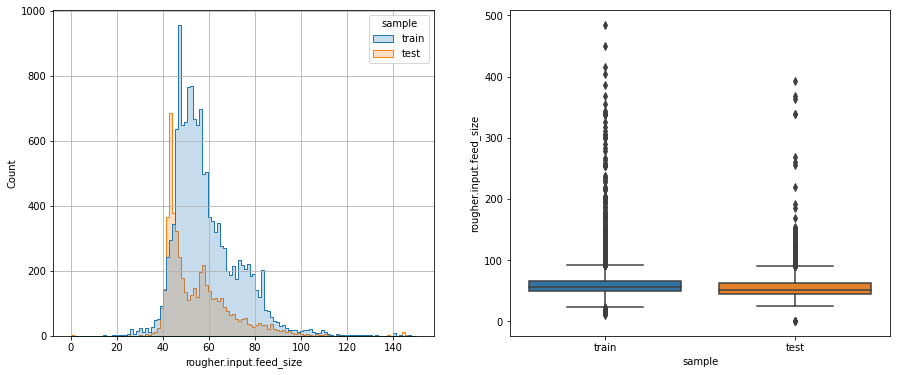

In [22]:
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

df_train_copy['sample'] = 'train'
df_test_copy['sample'] = 'test'
df_total = pd.concat([df_train_copy, df_test_copy])

display(df_total.groupby('sample')['rougher.input.feed_size'].describe().T)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(data=df_total, x='rougher.input.feed_size', hue="sample", 
                    binrange=(0,150), element='step')
plt.grid()
plt.subplot(1,2,2)
sns.boxplot(data=df_total, x='sample', y='rougher.input.feed_size')
plt.show()

Размеры гранул исходного сырья на обучающей и тестовой выборках несколько отличаются, однако отличия не сильные, в частности среднее значение на тестовой выборке составляет 56 ед., что всего на 4 ед. или примерно на 7% ниже обучающей выборки.

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [23]:
for stage in ['rougher.input.feed', 'rougher.output.concentrate', 
                'primary_cleaner.output.concentrate', 'final.output.concentrate']:
    df_full[stage+'_total'] = (df_full[stage+'_au'] + df_full[stage+'_ag'] +df_full[stage+'_pb'] + 
                                df_full[stage+'_sol'])
    print(stage)
    display(df_full[stage+'_total'].describe())

rougher.input.feed


count    19245.000000
mean        57.407926
std          7.165219
min          0.040000
25%         53.660745
50%         57.647093
75%         62.012223
max         76.978947
Name: rougher.input.feed_total, dtype: float64

rougher.output.concentrate


count    19416.000000
mean        68.188914
std         12.478522
min          0.000000
25%         66.026048
50%         70.186130
75%         74.362878
max         88.140119
Name: rougher.output.concentrate_total, dtype: float64

primary_cleaner.output.concentrate


count    19069.000000
mean        60.949928
std          9.953770
min          0.000000
25%         59.165854
50%         62.615189
75%         65.725507
max         80.749343
Name: primary_cleaner.output.concentrate_total, dtype: float64

final.output.concentrate


count    19227.000000
mean        68.727562
std          7.423741
min          0.000000
25%         67.985659
50%         69.632597
75%         71.390461
max         80.210644
Name: final.output.concentrate_total, dtype: float64

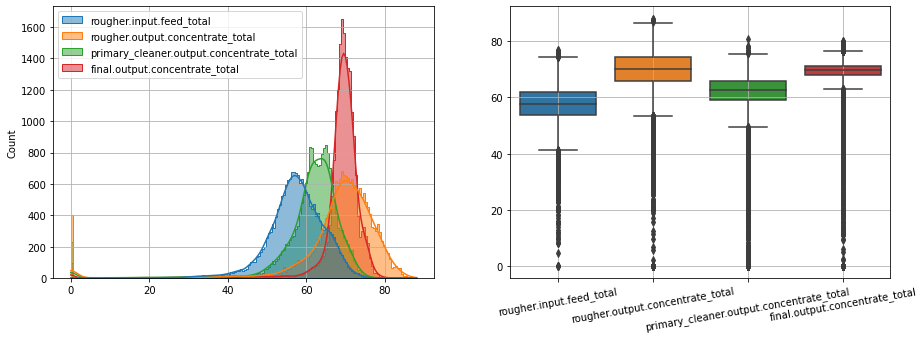

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=df_full[['rougher.input.feed_total', 'rougher.output.concentrate_total', 
            'primary_cleaner.output.concentrate_total', 'final.output.concentrate_total']], element='step', kde=True)
plt.grid()
plt.subplot(1,2,2)
sns.boxplot(data=df_full[['rougher.input.feed_total', 'rougher.output.concentrate_total', 
            'primary_cleaner.output.concentrate_total', 'final.output.concentrate_total']])
plt.grid()
plt.xticks(rotation=10)
plt.show()

Суммарная концентрация контролируемых веществ (Au, Ag, Pb, sol) в составе продукта на каждой из стадий обработки составляет в среднем от 57 до 67%. Каждая последующая стадия характеризуется, как правило, более узким интервалом градации суммарной концентрации, вероятно связанным с доведением качества и количественного состава до соответствующих стандартов.

## Модель

Восстановим целевой признак для тестовой выборки исходя из полных данных и идентификатора - времени соответствующего процесса.

In [25]:
df_test_merge= df_test.merge(df_full, how='left', on='date')
df_test[['rougher.output.recovery', 'final.output.recovery']] = (df_test_merge[['rougher.output.recovery', 
                                                                                    'final.output.recovery']])

Удалим из обучающей выборки столбцы, которые отсутствуют в тестовом наборе, также из обоих датасетов удалим признак времени.  

In [26]:
col_test_drop = set(df_train.columns) - set(df_test.columns)

In [27]:
df_train.drop(col_test_drop, axis=1, inplace=True)
df_train.drop('date', axis=1, inplace=True)
df_train.shape

(14149, 54)

In [28]:
df_test.drop('date', axis=1, inplace=True)
df_test.shape

(5290, 54)

Количество полей с пропусками сравнительно невелико. Заполнение пропусков без детального понимания технологического процесса, статистическими значениями может привести к ошибочным значениям. Удалим пропущенные поля из обущающего и тестового датасета.

In [29]:
df_train.dropna(how='any', inplace=True)
df_train.shape

(12679, 54)

In [30]:
df_test.dropna(how='any', inplace=True)
df_test.shape

(5229, 54)

Таким образом, было удалено около 10% от обущающего и около 1% тестового датасета.

Выделим отдельно признаки и таргет для обучающего и тестового набора данных

In [31]:
train_y = df_train[['rougher.output.recovery', 'final.output.recovery']] 
test_y = df_test[['rougher.output.recovery', 'final.output.recovery']] 

train_X = df_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
test_X = df_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

Функция для вычисления метрики качества модели -  *Symmetric Mean Absolute Percentage Error*.  

![smape](https://pictures.s3.yandex.net/resources/smape_1576239058.jpg)
![total_smape](https://pictures.s3.yandex.net/resources/_smape_1576239054.jpg)

In [32]:
def smape(target, pred):
    smape_rougher = sum(abs(target[:,0] - pred[:,0]) / ((abs(target[:,0]) + abs(pred[:,0]))/2)) / len(target) * 100
    smape_final = sum(abs(target[:,1] - pred[:,1]) / ((abs(target[:,1]) + abs(pred[:,1]))/2)) / len(target) * 100
    smape = 0.25 * smape_rougher + 0.75 * smape_final
    return smape

In [33]:
smape_score = make_scorer(smape, greater_is_better=False)

В качестве базовой модели используем модель Линейной регрессии.

In [34]:
model_lr = LinearRegression()

In [35]:
smape_lr = abs(cross_val_score(model_lr, X=train_X, y=np.array(train_y), cv=5,
                    scoring=smape_score).mean())
smape_lr

10.932332228426214

Исследуем модель Случайного Леса, для подбора лучшей модели будем последовательно варьировать гиперпараметры - n_estimators и max_depth. 

C:\Users\lugma\anaconda3\envs\practicum\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


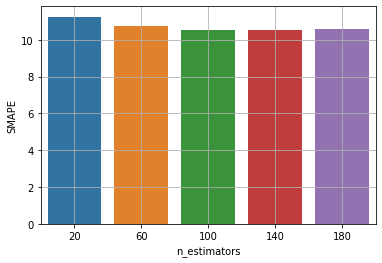

Метрика SMAPE лучшей модели на обущающем наборе данных: 10.54
Количество деревьев лучшей модели на обущающем наборе данных: 140


In [36]:
best_smape_rf = smape_lr
list_est=[]
list_smape=[]
for est in range(20, 201, 40):
    model_rf = RandomForestRegressor(n_estimators=est, random_state=123)
    smape_rf = abs(cross_val_score(model_rf, X=train_X, y=np.array(train_y), cv=5,
                    scoring=smape_score).mean())
    list_est.append(est)
    list_smape.append(smape_rf)
    if smape_rf < best_smape_rf:
        best_smape_rf = smape_rf
        best_est = est
        best_model_rf = model_rf

sns.barplot(list_est, list_smape)
plt.xlabel('n_estimators')
plt.ylabel('SMAPE')
plt.grid()
plt.show();

print(f'Метрика SMAPE лучшей модели на обущающем наборе данных: {best_smape_rf:.2f}')
print(f'Количество деревьев лучшей модели на обущающем наборе данных: {best_est}')

C:\Users\lugma\anaconda3\envs\practicum\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


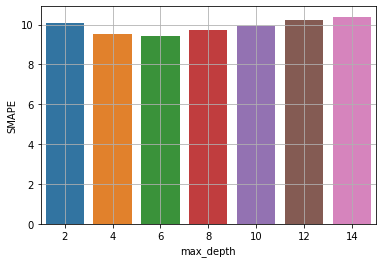

Метрика SMAPE лучшей модели на обущающем наборе данных: 9.44
Максимальная глубина лучшей модели на обущающем наборе данных: 6


In [37]:
best_smape_rf = best_smape_rf
list_depth=[]
list_smape=[]
for depth in range(2, 15, 2):
    model_rf = RandomForestRegressor(n_estimators=140, max_depth=depth, random_state=123)
    smape_rf = abs(cross_val_score(model_rf, X=train_X, y=np.array(train_y), cv=5,
                    scoring=smape_score).mean())
    list_depth.append(depth)
    list_smape.append(smape_rf)
    if smape_rf < best_smape_rf:
        best_smape_rf = smape_rf
        best_depth = depth
        best_model_rf = model_rf

sns.barplot(list_depth, list_smape)
plt.xlabel('max_depth')
plt.ylabel('SMAPE')
plt.grid()
plt.show();

print(f'Метрика SMAPE лучшей модели на обущающем наборе данных: {best_smape_rf:.2f}')
print(f'Максимальная глубина лучшей модели на обущающем наборе данных: {best_depth}')

In [38]:
model_rf = RandomForestRegressor(n_estimators=140, max_depth=6, random_state=123)
model_rf.fit(train_X, np.array(train_y))
test_pred = model_rf.predict(test_X)
test_smape = smape(np.array(test_y), test_pred)
print(f'Метрика SMAPE выбранной модели на тестовой выборке: {test_smape:.2f}')

Метрика SMAPE выбранной модели на тестовой выборке: 9.31


# Выводы  
Были подготовлены и проанализированы сырые данные, характеризующие параметры технологического процесса подготовки золотосодержащей руды и концентрации химических веществ на каждом из этапов ее подготовки. Проверена корректность расчета эффективности обогащения, выявлены особенности изменения ряда параметров в процессе очистки исходного концентрата.  
Для предсказания эффективности обогащения использована пользовательская метрика SMAPE, учитывающая две величины: эффективность обогащения чернового концентрата и финального концентрата. В качестве базовой модели использована линейная регрессия, метрика SMAPE на обучающей выборке по ней составила 10,9%. Для улучшения качества предсказаний исследована модель Случайного Леса, подобраны оптимальные гиперпараметры модели путем поиска минимальных значений метрики SMAPE с использованием кросс-валидации обучающего датасета. Метрика SMAPE лучшей модели, рассчитанная на обучающем наборе данных составила 9,4%, проверка на тестовом наборе данных подтвердила стабильность модели, метрика SMAPE составила 9.3%.

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке